## Ch3. Dimension Reduction V3

주성분분석으로 비지도학습하기

In [1]:
import time
start_time = time.time()

In [2]:
# 라이브러리 불러오기
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip

In [3]:
'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

In [4]:
'''데이터 준비 관련 라이브러리'''
from sklearn import preprocessing as pp

get_ipython().run_line_magic('matplotlib', 'inline')

In [6]:
# csv의 첫 행에 변수이름 포함함
TR0X = pd.read_csv('./mnistTRX.csv')
VLX = pd.read_csv('./mnistVLX.csv')
TSX = pd.read_csv('./mnistTSX.csv')

# y는 주로 1-d np.array나 Series로 처리하는 것이 좋으므로, DataFrame으로 읽고 Series로 변환함
TR0y = pd.read_csv('./mnistTRy.csv')['y']
VLy = pd.read_csv('./mnistVLy.csv')['y']
TSy = pd.read_csv('./mnistTSy.csv')['y']


In [7]:
# 인덱스를 지정 (안해도 무방하지만 표본추출에 의한 혼란을 방지하기 위해 확보)
iTR0 = range(0,len(TR0X))
iVL = range(len(TR0X), len(TR0X)+len(VLX))
iTS = range(len(TR0X)+len(VLX), len(TR0X)+len(VLX)+len(TSX))

In [8]:
# 데이터 셋 구조 확인
nX = [TR0X.shape, VLX.shape, TSX.shape]
ny = [TR0y.shape, VLy.shape, TSy.shape]
pd.DataFrame(nX, index=['TR0X','VLX','TSX'], columns=['n','p'])

n    p
TR0X  50000  784
VLX   10000  784
TSX   10000  784

In [9]:
pd.DataFrame(ny, index=['TR0y','VLy','TSy'], columns=['n'])

n
TR0y  50000
VLy   10000
TSy   10000

In [10]:
# TR 요약. 표준편차=0 인 피쳐 많음
TR0X.describe()

x01      x02      x03      x04      x05      x06      x07      x08  \
count  50000.0  50000.0  50000.0  50000.0  50000.0  50000.0  50000.0  50000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           x09      x10  ...          x775          x776          x777  \
count  50000.0  50000.0  ...  50000.000000  50000.000000  50000.000000   
mean       0.0      0.0  ...      0.000739      0.000354      0.000204   
std        0.0      0.0  ...      0.022784      0.015424      0.012080   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...      0.992188      0.992188      0.988281   

               x778          x779          x780     x781     x782     x783  \
count  50000.000000  50000.000000  50000.000000  50000.0  50000.0  50000.0   
mean       0.000090      0.000071      0.000009      0.0      0.0      0.0   
std        0.007218      0.007181      0.001483      0.0      0.0      0.0   
min        0.000000      0.000000      0.000000      0.0      0.0      0.0   
25%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
50%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
75%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
max        0.988281      0.992188      0.242188      0.0      0.0      0.0   

          x784  
count  50000.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

[8 rows x 784 columns]

In [11]:
tmp = TR0X.describe()
tmp

x01      x02      x03      x04      x05      x06      x07      x08  \
count  50000.0  50000.0  50000.0  50000.0  50000.0  50000.0  50000.0  50000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           x09      x10  ...          x775          x776          x777  \
count  50000.0  50000.0  ...  50000.000000  50000.000000  50000.000000   
mean       0.0      0.0  ...      0.000739      0.000354      0.000204   
std        0.0      0.0  ...      0.022784      0.015424      0.012080   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...      0.992188      0.992188      0.988281   

               x778          x779          x780     x781     x782     x783  \
count  50000.000000  50000.000000  50000.000000  50000.0  50000.0  50000.0   
mean       0.000090      0.000071      0.000009      0.0      0.0      0.0   
std        0.007218      0.007181      0.001483      0.0      0.0      0.0   
min        0.000000      0.000000      0.000000      0.0      0.0      0.0   
25%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
50%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
75%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
max        0.988281      0.992188      0.242188      0.0      0.0      0.0   

          x784  
count  50000.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

[8 rows x 784 columns]

In [12]:
(tmp.loc['std',:]<=0.0).sum()  # TR기준 p=784중 67개의 표준편차가 0임

67

In [13]:
np.min(TR0X.min()), np.max(TR0X.max())

(0.0, 0.99609375)

In [14]:
# 레이블 데이터 보기
TR0y.head()

0    5
1    0
2    4
3    1
4    9
Name: y, dtype: int64

In [15]:
def view_digit(example):
    label = TR0y.loc[example]
    image = TR0X.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

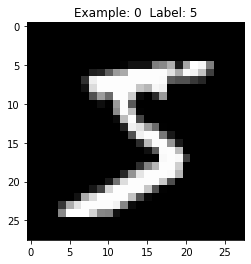

In [17]:
# 첫 번째 이미지 살펴보기
view_digit(0)

In [18]:
# LabelBinarizer로 가변수화
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
Tlb = LabelBinarizer()
TR0Y = Tlb.fit_transform(TR0y)
TR0Y[:2]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [19]:
# OneHotEncoder를 사용하려면 Series를 DataFrame으로 변환해야 함
Tohe = OneHotEncoder(sparse=False)
TR0Y = Tohe.fit_transform(pd.DataFrame(TR0y))
TR0Y[:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
# pd.DataFrame.sample 적용. MultiIndex (층:숫자, 원변수인덱스) 생성됨
TRX = TR0X.groupby(TR0y).apply(lambda x: x.sample(100, random_state=2018))

# MultiIndex (층:숫자, 원변수인덱스)에서 원변수인덱스를 추출하여 새 단일 인덱스로 재지정
iTR = TRX.index.to_frame()[1]
TRX.set_index(iTR, inplace=True)
TRy = TR0y.iloc[iTR]

In [21]:
TRy.head()

1907     0
5809     0
32846    0
8838     0
13044    0
Name: y, dtype: int64

In [22]:
TRX.head()   # 인덱스가 콩일되었는지 확인

x01  x02  x03  x04  x05  x06  x07  x08  x09  x10  ...  x775  x776  \
1                                                        ...               
1907   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
5809   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
32846  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
8838   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
13044  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

       x777  x778  x779  x780  x781  x782  x783  x784  
1                                                      
1907    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5809    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
32846   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
8838    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
13044   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 784 columns]

In [23]:
# 주성분 분석
from sklearn.decomposition import PCA

n_components = 784   # 추출할 PC개수. 생략하면 모든 PC사용. [0,1]사이값이면 최소 누적설명량
whiten = False      # True면 PCA sphering(;PC점수를  분산이 1이 되도록 화이트닝). 다른 방법:ZCA sphering(Mahalanobis sphering)
random_state = 2018

Epca = PCA(n_components=n_components,   # 추출할 PC개수. 생략하면 모든 PC사용. [0,1]사이값이면 최소 누적설명량
           whiten=whiten,
           random_state=random_state)

In [24]:
# 주성분 점수
TRXTpca = Epca.fit_transform(TRX)
TRXTpca = pd.DataFrame(data=TRXTpca, index=iTR)

In [25]:
# 주성분점수간 상관행렬. 주성분은 서로 상관없으므로 I
TRXTpca.corr().round(3) # sns.heatmap(TRXT.corr())

0    1    2    3    4    5    6    7    8    9    ...    774    775  \
0    1.0  0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  ... -0.000 -0.000   
1    0.0  1.0  0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  ... -0.000 -0.000   
2   -0.0  0.0  1.0 -0.0 -0.0  0.0  0.0  0.0  0.0  0.0  ... -0.000  0.000   
3    0.0  0.0 -0.0  1.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  ... -0.000 -0.000   
4    0.0  0.0 -0.0  0.0  1.0 -0.0  0.0  0.0  0.0 -0.0  ... -0.000 -0.000   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
779  0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  ...  0.000 -0.000   
780 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  ... -0.000  0.000   
781 -0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0  ...  0.001 -0.001   
782  0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0  ... -0.000  0.001   
783 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  ... -0.000  0.001   

       776  777    778  779  780  781  782  783  
0   -0.000 -0.0 -0.000  0.0 -0.0 -0.0  0.0 -0.0  
1    0.000  0.0 -0.000  0.0 -0.0 -0.0 -0.0 -0.0  
2   -0.000 -0.0  0.000 -0.0  0.0 -0.0  0.0  0.0  
3   -0.000  0.0  0.000  0.0 -0.0  0.0 -0.0 -0.0  
4    0.000 -0.0  0.000  0.0 -0.0  0.0  0.0 -0.0  
..     ...  ...    ...  ...  ...  ...  ...  ...  
779  0.000  0.0 -0.000  1.0  0.0 -0.0  0.0  0.0  
780 -0.000 -0.0  0.000  0.0  1.0  0.0 -0.0 -0.0  
781  0.001  0.0 -0.001 -0.0  0.0  1.0  0.0  0.0  
782 -0.000 -0.0  0.000  0.0 -0.0  0.0  1.0 -0.0  
783 -0.000 -0.0  0.000  0.0 -0.0  0.0 -0.0  1.0  

[784 rows x 784 columns]

In [26]:
# 주성분점수의 분산 = S의 아이겐값
TRXTpca.var().round(3)

0      5.278
1      3.636
2      3.463
3      2.996
4      2.550
       ...  
779    0.000
780    0.000
781    0.000
782    0.000
783    0.000
Length: 784, dtype: float64

In [27]:
TRXTpca.cov().round(3)  # 대각원소가 아이겐값

0      1      2      3     4    5    6    7    8    9    ...  774  775  \
0    5.278  0.000 -0.000  0.000 -0.00 -0.0  0.0  0.0  0.0 -0.0  ... -0.0 -0.0   
1    0.000  3.636  0.000  0.000  0.00 -0.0 -0.0  0.0  0.0  0.0  ... -0.0  0.0   
2   -0.000  0.000  3.463 -0.000 -0.00  0.0  0.0 -0.0  0.0 -0.0  ... -0.0  0.0   
3    0.000  0.000 -0.000  2.996  0.00 -0.0  0.0 -0.0 -0.0  0.0  ... -0.0 -0.0   
4   -0.000  0.000 -0.000  0.000  2.55 -0.0  0.0  0.0  0.0 -0.0  ... -0.0 -0.0   
..     ...    ...    ...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
779  0.000  0.000 -0.000  0.000 -0.00 -0.0 -0.0  0.0 -0.0 -0.0  ...  0.0 -0.0   
780 -0.000 -0.000  0.000  0.000 -0.00  0.0 -0.0 -0.0  0.0  0.0  ... -0.0  0.0   
781 -0.000 -0.000 -0.000  0.000 -0.00  0.0 -0.0 -0.0 -0.0  0.0  ...  0.0 -0.0   
782  0.000 -0.000  0.000 -0.000  0.00  0.0 -0.0  0.0 -0.0 -0.0  ... -0.0  0.0   
783  0.000 -0.000 -0.000 -0.000 -0.00 -0.0 -0.0  0.0 -0.0 -0.0  ... -0.0  0.0   

     776  777  778  779  780  781  782  783  
0    0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  
1    0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  
2   -0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  
3   -0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  
4   -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  
779  0.0  0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  
780 -0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  
781  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.0  
782 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0  
783 -0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0  

[784 rows x 784 columns]

In [28]:
# X개의 주성분으로 추출한 원본 데이터의 분산 비율
def summaryPCA(PCAobj):
  # pcid   = np.arange(1, PCAobj.n_components_+1)
  eigval = pd.DataFrame(PCAobj.explained_variance_)
  prop   = pd.DataFrame(PCAobj.explained_variance_ratio_)
  cumul  = pd.DataFrame(np.cumsum(prop)/prop.sum())
  #vrexp  = pd.DataFrame(np.c_[eigval, prop, cumul], columns=['ExpVar(eigval)','Prop','Cumulative'])
  vrexp = pd.concat([eigval, prop, cumul], axis=1).T
  vrexp.index = ['Eigenvalue','Prop','Cumulative']
  return vrexp

vrexp = summaryPCA(Epca)
vrexp.loc[:,[0, 1, 2, 9, 19, 49, 99, 199, 299, 399, 499, 599, 699]].round(3)

0      1      2      9      19     49     99     199    299  \
Eigenvalue  5.278  3.636  3.463  1.277  0.624  0.173  0.052  0.013  0.005   
Prop        0.100  0.069  0.065  0.024  0.012  0.003  0.001  0.000  0.000   
Cumulative  0.100  0.168  0.234  0.495  0.653  0.836  0.926  0.976  0.993   

              399  499  599  699  
Eigenvalue  0.002  0.0  0.0  0.0  
Prop        0.000  0.0  0.0  0.0  
Cumulative  0.998  1.0  1.0  1.0

In [29]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
ev = sns.barplot(data=pd.DataFrame(vrexp.loc['Eigenvalue',:20]).T, color='b', ax=ax[0]);
ev.set(title='Eigenvalues of S', xlabel='PC', ylabel='Eigenvalues')
pr = sns.barplot(data=pd.DataFrame(vrexp.loc['Prop',:20]).T, color='b', ax=ax[1]);
pr.set(title='Variance Explained by PC', xlabel='PC', ylabel='Proportion')
cm = sns.barplot(data=pd.DataFrame(vrexp.loc['Cumulative',:20]).T, color='b', ax=ax[2]);
cm.set(title='Variance Explained by PC(Cumulative)', xlabel='PC', ylabel='Cumulative Proportion', ylim=[0,1]);


In [30]:
# PC1, PC2 점수의 산점도
# xDF: XTh, yDF: y
# tempDF = [xDF의 첫번째 벡터(PC1 score), xDF의 두번째 벡터(PC2 score), y]
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)  # 첫 2개의 성분
    tempDF = pd.concat( [tempDF, yDF], axis=1, join='inner')     # 인덱스를 키로 inner조인함. 샘플의 일부 사용시 편리
    tempDF.columns = ['First Vector', 'Second Vector', 'Label']
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=tempDF, fit_reg=False) # lmplot으로 산점도
    #sns.scatterplot(x='First Vector', y='Second Vector', hue='Label', data=tempDF)
    ax = plt.gca()  # Get the Current Axes instance. 현재 축 정보 저장
    ax.set_title('Separation of Observations using '+algoName)

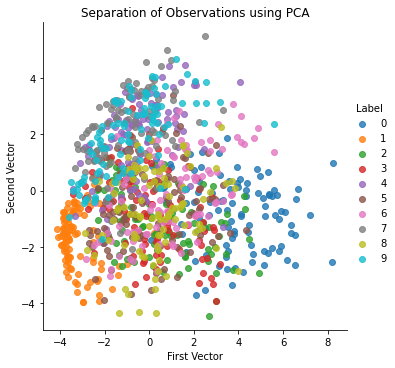

In [31]:

# PC1 score vs PC2 score 산점도
scatterPlot(TRXTpca, TRy, 'PCA')

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
d0 = sns.scatterplot(x=TRXTpca.loc[:,0], y=TRXTpca.loc[:,1], hue=TRy==0, alpha=0.5, ax=axs[0,0])
d0.set(xlabel='PC1', ylabel='PC2', title='y=0')
d1 = sns.scatterplot(x=TRXTpca.loc[:,0], y=TRXTpca.loc[:,1], hue=TRy==1, alpha=0.5, ax=axs[0,1])
d1.set(xlabel='PC1', ylabel='PC2', title='y=1')
d5 = sns.scatterplot(x=TRXTpca.loc[:,0], y=TRXTpca.loc[:,1], hue=TRy==5, alpha=0.5, ax=axs[1,0])
d5.set(xlabel='PC1', ylabel='PC2', title='y=5')
dd = sns.scatterplot(x=TRXTpca.loc[:,0], y=TRXTpca.loc[:,1], hue=TRy, alpha=0.5, ax=axs[1,1])
dd.set(xlabel='PC1', ylabel='PC2', title='0~9')

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2'), Text(0.5, 1.0, '0~9')]

* (아래 코드) 임의로 잡은 값

In [33]:
# x351, x407 값
TRX.iloc[:,[350,406]].head()

x351  x407
1                
1907    0.0   0.0
5809    0.0   0.0
32846   0.0   0.0
8838    0.0   0.0
13044   0.0   0.0

In [34]:
# x351, x407의 산점도: y 구분 불가능 (원변수 두 개만 가지고 y를 구분하는 것은 불가능)
XX = pd.DataFrame(data=TRX.iloc[:,[350,406]], index=iTR)
XX = pd.concat([XX, TRy], axis=1, join='inner')
# XX.columns = ['x351', 'x407', 'y']
sns.lmplot(x='x351', y='x407', hue='y', data=XX, fit_reg=False)
ax = plt.gca()  # get the current axes
ax.set_title('Separation of Observations Using Original Feature Set (x351, x407)');

In [36]:
# 3D scatter: 첫 3개의 주성분으로 구분하기. 전체 분산의 23.4%만 설명됨
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (16, 9))
ax  = plt.axes(projection ='3d')
p   = ax.scatter3D(TRXTpca[0],TRXTpca[1],TRXTpca[2], alpha=0.5, c=TRy)
ax.set_xlabel('X:PC1')
ax.set_ylabel('Y:PC2')
ax.set_zlabel('Z:PC3')

Text(0.5, 0, 'Z:PC3')

In [37]:
import plotly.express as px
# 처음 3개의 주성분 점수에 대해 3D 산점도. 제일 구분 잘 되는 1 기준 으로 모든 관측값 시각화
fig = px.scatter_3d(TRXTpca, x=0, y=1, z=2, color=TRy, size=TRy,  size_max=10) #, opacity=0.5, size=0.1
fig.show()

* 주성분을 하게 되면 꼭 그림으로 확인하지 않더라도 알아서 잘 처리됨(?)

In [38]:
fig = px.scatter_3d(TRXTpca, x=0, y=1, z=2,
                    color=TRy==1,     #
                    symbol=TRy==1,
                    size=1+(TRy==1).astype(int),
                    size_max=9,
                    opacity=0.5) #, size=0.1)
fig.show()

### X(원데이터) -> XT(변환된 X; 주성분점수) -> X hat

In [41]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error

# 1단계: CV분할
# SKF5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018) # CV할 때 y가 없으므로 사용불가

KF5 = KFold(n_splits=5, shuffle=True, random_state=2018)


def negmse(estimator, X, y=None):
    XT = estimator.transform(X)           # 성분점수
    Xh = estimator.inverse_transform(XT)  # 성분점수로부터 Xh(X의 예측값) 반환. inverse_transform으로 Xh 계산
    return -1 * mean_squared_error(X, Xh) # GOF가 되도록 (-)

In [42]:
parampca ={'n_components':[100, 200, 300, 400, 500, 600, 700]}  # 7개의 성분수에 대해 튜닝

Epca2 = PCA()
GSpca = GridSearchCV(Epca2, param_grid=parampca, cv=KF5, scoring=negmse)
get_ipython().run_line_magic('time', 'GSpca.fit(TRX)')
GSpca.score(TRX, TRy), GSpca.score(VLX, VLy), GSpca.score(TSX, TSy)

CPU times: user 1min 29s, sys: 24.3 s, total: 1min 54s
Wall time: 20.8 s


(-2.992502224254306e-31, -1.0060629818154786e-05, -9.974237222033588e-06)

In [44]:
CV = pd.DataFrame(GSpca.cv_results_)    # 7(params) x 5 (folds); cv_results_: cv 결과 들어있음
# n_components가 많을수록 성능이 좋기 때문에 지도학습에 비해 결과가 명확하지 않음.
# cv보다는 screeplot, min_eigenvalue > 0.7, 누적설명량 > 0.9 등의 기준이 더 현실적임
# CV.filter(regex='^params|^rank|test_score$').sort_values('rank_test_score')
CV[['params','param_n_components','mean_test_score','rank_test_score']].sort_values('rank_test_score')

params param_n_components  mean_test_score  rank_test_score
6  {'n_components': 700}                700        -0.000008                1
5  {'n_components': 600}                600        -0.000020                2
4  {'n_components': 500}                500        -0.000116                3
3  {'n_components': 400}                400        -0.000589                4
2  {'n_components': 300}                300        -0.001548                5
1  {'n_components': 200}                200        -0.003177                6
0  {'n_components': 100}                100        -0.006868                7

<AxesSubplot:xlabel='param_n_components', ylabel='mean_test_score'>

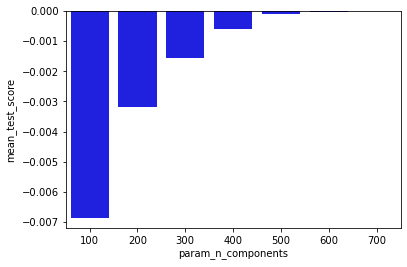

In [45]:
sns.barplot(x='param_n_components', y='mean_test_score', data=CV, color='b')

In [46]:
print(GSpca.best_score_)  # mean_test_score(negmse) at best_params
print(GSpca.best_params_)
print(GSpca.best_estimator_)

-7.863439418155841e-06
{'n_components': 700}
PCA(n_components=700)


### 점진적PCA

In [47]:
# 점진적 PCA
from sklearn.decomposition import IncrementalPCA

n_components = 784  # 추출할 PC개수. 생략하면 모든 PC사용. [0,1]사이값이면 최소 누적설명량
batch_size = None  #  None이면 데이터 크기를 고려하여 자동으로 설정함

Eipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

In [48]:
get_ipython().run_line_magic('time', 'TRXTipca = Eipca.fit_transform(TRX)')
TRXTipca = pd.DataFrame(data=TRXTipca, index=iTR)

VLXTipca = Eipca.transform(VLX)
VLXTipca = pd.DataFrame(data=VLXTipca, index=iVL)

print(TRXTipca.shape)
scatterPlot(TRXTipca, TRy, 'Incremental PCA')

CPU times: user 8.27 s, sys: 1.04 s, total: 9.31 s
Wall time: 2.12 s
(1000, 784)


In [51]:
from sklearn.decomposition import SparsePCA

n_components=100
alpha=0.0001
random_state=2018
n_jobs= -1


...

E = SparsePCA(...)
XT = E.fit_transform(X)
scatterPlot(X)

NameError: name 'X' is not defined

CPU times: user 10 s, sys: 1.54 s, total: 11.5 s
Wall time: 4.25 s
CPU times: user 62.5 ms, sys: 19.1 ms, total: 81.5 ms
Wall time: 13.9 ms
(1000, 100)


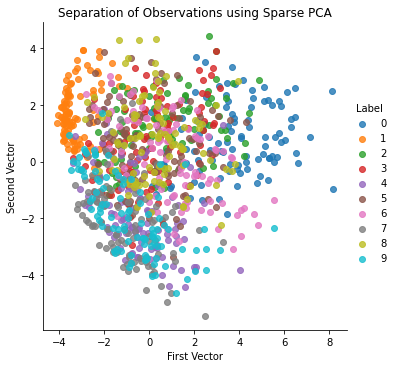

In [52]:
# 희소 PCA
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

# 수정 사항:normalize_components='deprecated' 설정하면 경고 삭제됨 components 정규화는 무조건 실행되므로 의미 없는 옵션
Espca = SparsePCA(n_components=n_components,
                  alpha=alpha,
                  random_state=random_state,
                  n_jobs=n_jobs)
                  #,normalize_components='deprecated'

get_ipython().run_line_magic('time', 'Espca.fit(TRX)  # Espca.fit(TR0X.loc[:10000,:])')
get_ipython().run_line_magic('time', 'TRXTspca  = Espca.transform(TRX)')
TRXTspca  = pd.DataFrame(data=TRXTspca, index=iTR)

VLXTspca  = Espca.transform(VLX)
VLXTspca  = pd.DataFrame(data=VLXTspca, index=iVL)

print(TRXTspca.shape)
scatterPlot(TRXTspca, TRy, 'Sparse PCA')

### Kernel PCA

비선형 PCA

결과 그림 보고 모름

CPU times: user 1.92 s, sys: 636 ms, total: 2.55 s
Wall time: 568 ms
CPU times: user 181 ms, sys: 35.3 ms, total: 216 ms
Wall time: 30.1 ms
(1000, 200)


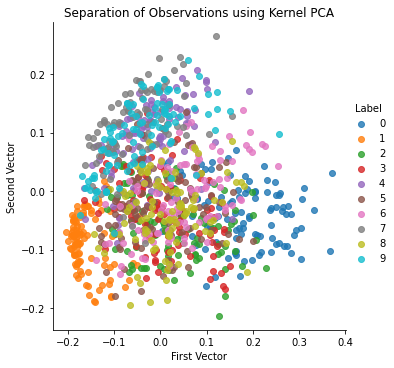

In [54]:
# 커널 PCA
from sklearn.decomposition import KernelPCA

n_components = 200
kernel = 'rbf'        # 'linear,poly,rbf,sigmoid,cosine,precomputed'
gamma = None         # 커널폭. 기본값(None) = 1/p, 감마는 튜닝해야하는데 그냥 진행
random_state = 2018
n_jobs = 1            # 병렬작업개수. 기본값(None)이면 1.

Ekpca = KernelPCA(n_components=n_components,
                  kernel=kernel,
                  gamma=gamma,
                  n_jobs=n_jobs,
                  random_state=random_state)

get_ipython().run_line_magic('time', 'Ekpca.fit(TRX)      # Ekpca.fit(TR0X)')
get_ipython().run_line_magic('time', 'TRXTkpca  = Ekpca.transform(TRX)')

TRXTkpca  = pd.DataFrame(data=TRXTkpca, index=iTR)

VLXTkpca  = Ekpca.transform(VLX)
VLXTkpca  = pd.DataFrame(data=VLXTkpca, index=iVL)

print(TRXTkpca.shape)
scatterPlot(TRXTkpca, TRy, 'Kernel PCA')

In [55]:
paramkpca ={
    'gamma':np.linspace(0.01, 0.05, 5),
    'kernel': ['rbf','linear']
}
Ekpca2 = KernelPCA(n_components=200, fit_inverse_transform=True, n_jobs=n_jobs, random_state=random_state)
GSkpca = GridSearchCV(Ekpca2, param_grid=paramkpca, cv=KF5, scoring=negmse)

get_ipython().run_line_magic('time', 'GSkpca.fit(TRX) # TRX의 일부만 사용하여 적합')
GSkpca.score(TRX), GSkpca.score(VLX), GSkpca.score(TSX)

CPU times: user 1min 13s, sys: 24.3 s, total: 1min 37s
Wall time: 24.2 s


(-0.040127291634051175, -0.0411753122154282, -0.04147315559415965)

In [56]:
CV = pd.DataFrame(GSkpca.cv_results_)    # 10(params combination = 5개 gamma, 2개 커널) x 5 (folds)
# n_components가 많을수록 성능이 좋기 때문에 지도학습에 비해 결과가 명확하지 않음.
# 튜닝모수보다 성분수가 더 중요함
# CV.filter(regex='^params|^rank|test_score$').sort_values('rank_test_score')
CV.filter(regex='^params|test_score$').sort_values('rank_test_score')

params  split0_test_score  split1_test_score  \
2     {'gamma': 0.02, 'kernel': 'rbf'}          -0.045202          -0.045304   
4     {'gamma': 0.03, 'kernel': 'rbf'}          -0.046400          -0.046582   
1  {'gamma': 0.01, 'kernel': 'linear'}          -0.049279          -0.049091   
3  {'gamma': 0.02, 'kernel': 'linear'}          -0.049279          -0.049091   
5  {'gamma': 0.03, 'kernel': 'linear'}          -0.049279          -0.049091   
7  {'gamma': 0.04, 'kernel': 'linear'}          -0.049279          -0.049091   
9  {'gamma': 0.05, 'kernel': 'linear'}          -0.049279          -0.049091   
6     {'gamma': 0.04, 'kernel': 'rbf'}          -0.049400          -0.049662   
0     {'gamma': 0.01, 'kernel': 'rbf'}          -0.050170          -0.050142   
8     {'gamma': 0.05, 'kernel': 'rbf'}          -0.052644          -0.052989   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
2          -0.045994          -0.045729          -0.044710        -0.045388   
4          -0.047405          -0.047082          -0.045932        -0.046680   
1          -0.048800          -0.048866          -0.049192        -0.049046   
3          -0.048800          -0.048866          -0.049192        -0.049046   
5          -0.048800          -0.048866          -0.049192        -0.049046   
7          -0.048800          -0.048866          -0.049192        -0.049046   
9          -0.048800          -0.048866          -0.049192        -0.049046   
6          -0.050608          -0.050251          -0.049028        -0.049790   
0          -0.050842          -0.050581          -0.049832        -0.050314   
8          -0.053987          -0.053637          -0.052389        -0.053129   

   std_test_score  rank_test_score  
2        0.000444                1  
4        0.000517                2  
1        0.000185                3  
3        0.000185                3  
5        0.000185                3  
7        0.000185                3  
9        0.000185                3  
6        0.000571                8  
0        0.000356                9  
8        0.000599               10

<AxesSubplot:xlabel='param_gamma', ylabel='mean_test_score'>

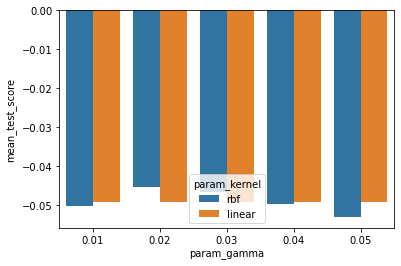

In [57]:
sns.barplot(x='param_gamma', y='mean_test_score', hue='param_kernel', data=CV)

In [58]:
print(GSkpca.best_score_)  # mean_test_score(negmse) at best_params
print(GSkpca.best_params_)
print(GSkpca.best_estimator_)

-0.045388023904173715
{'gamma': 0.02, 'kernel': 'rbf'}
KernelPCA(fit_inverse_transform=True, gamma=0.02, kernel='rbf',
          n_components=200, n_jobs=1, random_state=2018)


### 더 많이 쓰이는 방법

GridSearch, RandomSearch 사용여부는 상관없음

In [59]:
# 지도학습시 파이프라인에 차원축소를 포함시켜서 사용할 수 있음
# https://tekworld.org/2018/12/08/day-29-100-days-mlcode-kernel-pca-lle/#page-content
# https://www.coursehero.com/file/ppvcbos/Then-it-uses-GridSearchCV-to-find-the-best-kernel-and-gamma-value-for-kPCA-in/

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
PEglm  = Pipeline([('kpca', KernelPCA()),
                   ('glm', LogisticRegression())])

SKF5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)
param_grid = {
    'kpca__n_components':[100, 200],
    'kpca__gamma': np.linspace(0.01, 0.05, 5),
    'kpca__kernel': ['rbf', 'linear','sigmoid']}

GSglm = GridSearchCV(PEglm, param_grid, cv=SKF5)  # KPCA할 때 TRX의 일부만 사용해서 SKF5 사용할 수 없음.
#%time GSglm.fit(TRX.loc[:10000,:], TRy.loc[:10000,'y'])
# 오류발생가능: column-vector y was passed when a 1d array was expected. change shape of y to (n_samples, ) using ravel()
# lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
get_ipython().run_line_magic('time', 'GSglm.fit(TRX, TRy) # column-vector y was passed when a 1d array was expected. change shape of y to (n_samples, ) using ravel()')
print(GSglm.best_score_)
print(GSglm.best_params_)

CPU times: user 4min 11s, sys: 1min 20s, total: 5min 31s
Wall time: 1min 8s
0.873
{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf', 'kpca__n_components': 200}


In [60]:
GSglm.best_estimator_.predict(TRX)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 6, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 3,

(0.94, 0.9007, 0.896)

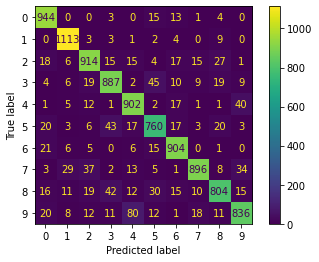

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
display = ConfusionMatrixDisplay.from_predictions(TSy, GSglm.best_estimator_.predict(TSX))

GSglm.best_estimator_.score(TRX, TRy), GSglm.best_estimator_.score(VLX, VLy), GSglm.best_estimator_.score(TSX, TSy)

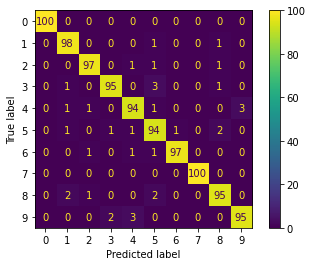

In [67]:
PEglm2 = Pipeline([('pca', PCA(n_components=50)),
                   ('glm', LogisticRegression())])

PEglm2.fit(TRX, TRy)
TRyh = PEglm2.predict(TRX)
display = ConfusionMatrixDisplay.from_predictions(TRy, TRyh)